Loading Model
Done Loading
f3g5 f3e5 [0.49774334 0.5022567 ]
f3e5 f3h4 [0.49277735 0.5072227 ]
f3h4 f3d4 [0.48996833 0.5100317 ]
f3d4 f3g1 [0.4996858 0.5003142]
f3g1 h1g1 [0.4901348  0.50986516]
h1g1 b1c3 [0.4957051 0.5042949]
b1c3 b1a3 [0.4996858 0.5003142]
b1a3 h2h3 [0.4888724  0.51112753]
h2h3 g2g3 [0.49587554 0.50412446]
g2g3 e2e3 [0.4918567 0.5081433]
e2e3 d2d3 [0.48988733 0.51011264]
d2d3 c2c3 [0.48976102 0.51023895]
c2c3 b2b3 [0.493925   0.50607497]
b2b3 a2a3 [0.4936687  0.50633126]
a2a3 h2h4 [0.48898894 0.5110111 ]
h2h4 g2g4 [0.49141112 0.5085888 ]
g2g4 e2e4 [0.4923552 0.5076448]
e2e4 d2d4 [0.4925736 0.5074264]
d2d4 c2c4 [0.49112758 0.5088724 ]
c2c4 b2b4 [0.49241024 0.5075897 ]
b2b4 a2a4 [0.49451953 0.50548047]
----------
f3g5 f3e5 [0.4965811 0.503419 ]
f3e5 f3h4 [0.49216846 0.5078315 ]
f3h4 f3d4 [0.48984683 0.5101532 ]
f3d4 f3g1 [0.4996858 0.5003142]
f3g1 h1g1 [0.48986322 0.5101368 ]
h1g1 b1c3 [0.49454296 0.50545704]
b1c3 b1a3 [0.4996858 0.5003142]
b1a3 a1a3 [0.48913118 0.5108

e1d2 d1f3 [0.49638918 0.50361085]
d1f3 d1d3 [0.48872143 0.5112785 ]
d1d3 d1e2 [0.48960158 0.5103984 ]
d1e2 d1d2 [0.4880465 0.5119534]
d1d2 d1c2 [0.4928086 0.5071914]
d1c2 c1h6 [0.4888854  0.51111454]
c1h6 c1g5 [0.50013906 0.49986097]
c1h6 c1f4 [0.4996858 0.5003142]
c1f4 c1e3 [0.4996858 0.5003142]
c1e3 c1a3 [0.4996858 0.5003142]
c1a3 c1d2 [0.4900538 0.5099462]
c1d2 c1b2 [0.48901996 0.51097995]
c1b2 b1c3 [0.5004255 0.4995745]
c1b2 b1a3 [0.4996858 0.5003142]
b1a3 b1d2 [0.49687365 0.5031264 ]
b1d2 a1a4 [0.48932254 0.5106774 ]
a1a4 a1a3 [0.4996858 0.5003142]
a1a3 a1a2 [0.490268   0.50973195]
a1a2 c5c6 [0.49968928 0.50031066]
c5c6 h4h5 [0.49445057 0.50554943]
h4h5 d4d5 [0.4966175  0.50338244]
----------
h1h3 h1h2 [0.49611264 0.5038873 ]
h1h2 h1g1 [0.4962366  0.50376344]
h1g1 f1a6 [0.48795846 0.51204157]
f1a6 f1b5 [0.4996858 0.5003142]
f1b5 f1c4 [0.49064353 0.50935656]
f1c4 f1h3 [0.4996858 0.5003142]
f1h3 f1d3 [0.48568246 0.5143176 ]
f1d3 f1g2 [0.48880568 0.5111943 ]
f1g2 f1e2 [0.4917957 0.50

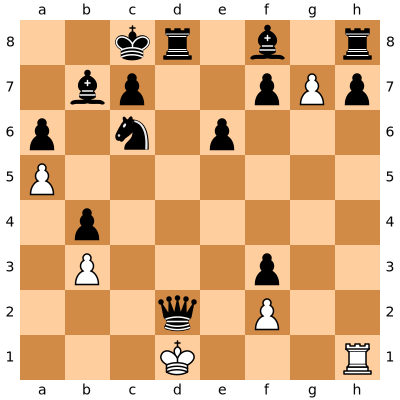

0-1



In [23]:
import chess
import random
import chess.engine
import chess.svg

import keras
from keras.models import load_model
from keras.utils import CustomObjectScope
from keras.initializers import glorot_uniform
import tensorflow as tf 
import pandas as pd
import numpy as np

def getBitboard(board):
    """
        A bitboard is a representation of the current board state
        There are a total of 64 squares on the board, 6 pieces, and 2 colors
        Each unique piece/color has 64 indices, with a 1 indicating that the piece exists at that location
        4 extra indices are for castling rights on each size
        1 extra index indicates whose turn it is
    """
    bitboard = np.zeros(2*6*64  + 5)

    pieceIndices = {
        'p': 0,
        'n': 1,
        'b': 2,
        'r': 3,
        'q': 4,
        'k': 5}

    for i in range(64):
        if board.piece_at(i):
            color = int(board.piece_at(i).color)
            bitboard[(6*color + pieceIndices[board.piece_at(i).symbol().lower()] + 12*i)] = 1

    bitboard[-1] = int(board.turn)
    bitboard[-2] = int(board.has_kingside_castling_rights(True))
    bitboard[-3] = int(board.has_kingside_castling_rights(False))
    bitboard[-4] = int(board.has_queenside_castling_rights(True))
    bitboard[-5] = int(board.has_queenside_castling_rights(False))

    return bitboard

def convertToFeatureVector(boardState):
    pieces = []
    encoding = {'P':1,'R':2,'N':3,'B':4,'Q':5,'K':6,'p':-1,'r':-2,'n':-3,'b':-4,'q':-5,'k':-6, '.':0}
    for i in range(64):
        piece = boardState.piece_at(i)
        if piece:
            piece = piece.symbol()
        else:
            piece = '.'
        pieces.append(encoding[piece])
    return pieces

print("Loading Model")
model = tf.keras.models.load_model("deepchess-20191119-173456.h5")
print("Done Loading")

def evaluateMove(move1, move2):
    #simple_dense.h5
    
    df1 = pd.DataFrame(data=[move1])
    df2 = pd.DataFrame(data=[move2])
    return model.predict([df1, df2])

def countMoves(moves):
    length = 0
    for _ in moves:
        length += 1
    return length

winCount = 0
printStr = ""
for _ in range(0, 1):

    board = chess.Board()
    engine = chess.engine.SimpleEngine.popen_uci("./stockfish_10_x64")
    for i in range(0, 2):
        moves = board.legal_moves
        moveCount = countMoves(moves)
        randomIndex = random.randrange(0,moveCount,1)

        count = 0
        for move in moves:
            if(count == randomIndex):
                board.push(move)
                break
            count += 1

    '''
    nnWhite = True
    if (random.random() < .5):
        result = engine.play(board, chess.engine.Limit(time=0.1))
        board.push(result.move)
        nnWhite = False
    '''

    while not board.is_game_over():
#         display(chess.svg.board(board=board))
        ogBoard = board
        count = 0
        move1 = move2 = None
        board1 = board2 = None

        for move in ogBoard.legal_moves:
            if count == 0:
                move1 = move
            else:
                modBoard = ogBoard
                move2 = move
                
                modBoard.push(move1)
#                 move1Feature = convertToFeatureVector(modBoard)
                move1Feature = getBitboard(modBoard)
                modBoard.pop()
                
                modBoard.push(move2)
#                 move2Feature = convertToFeatureVector(modBoard)
                move1Feature = getBitboard(modBoard)
                modBoard.pop()
                strengthArr = evaluateMove(move1Feature, move2Feature)[0]
                print(move1, move2, strengthArr)
                if(strengthArr[0] < strengthArr[1]):
                    move1 = move2

                #compare
            count += 1

        board.push(move1)
#         display(chess.svg.board(board=board))

        if(board.is_game_over()):
            break;
        
        result = engine.play(board, chess.engine.Limit(depth=1))
        board.push(result.move)
        print('----------')

        
    printStr = printStr+""+board.result()+"\n"
    engine.quit()
    display(chess.svg.board(board=board))

print(printStr)
